In [1]:
# https://note.com/npaka/n/n5fd3d8ecf1e6

# パッケージのインストール
!pip install diffusers[torch]==0.9 transformers
!pip install --upgrade --pre triton

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 453.1/453.1 kB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 63.1 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.3/215.3 kB 3.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 58.9 MB/s eta 0:00:00:00:01
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 18.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 45.1 MB/s eta 0:00:0000:0100:01
  Created wheel for lit: filename=lit-16.0.2-py3-none-any.whl size=88174 sha256=caa6874d16e24707d7faaf362c1e42

In [4]:
# xformersのインストール
!pip install -U xformers

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.2/108.2 MB 9.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 1.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 23.6 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 35.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 44.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 16.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 3.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 5.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━

In [5]:
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler
import torch

# パイプラインの準備
model_id = "stabilityai/stable-diffusion-2"
pipe = StableDiffusionPipeline.from_pretrained(
    model_id, 
    scheduler=EulerDiscreteScheduler.from_pretrained(
        model_id, 
        subfolder="scheduler"
    ), 
    torch_dtype=torch.float16,
    revision="fp16"
).to("cuda")
pipe.enable_attention_slicing()

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

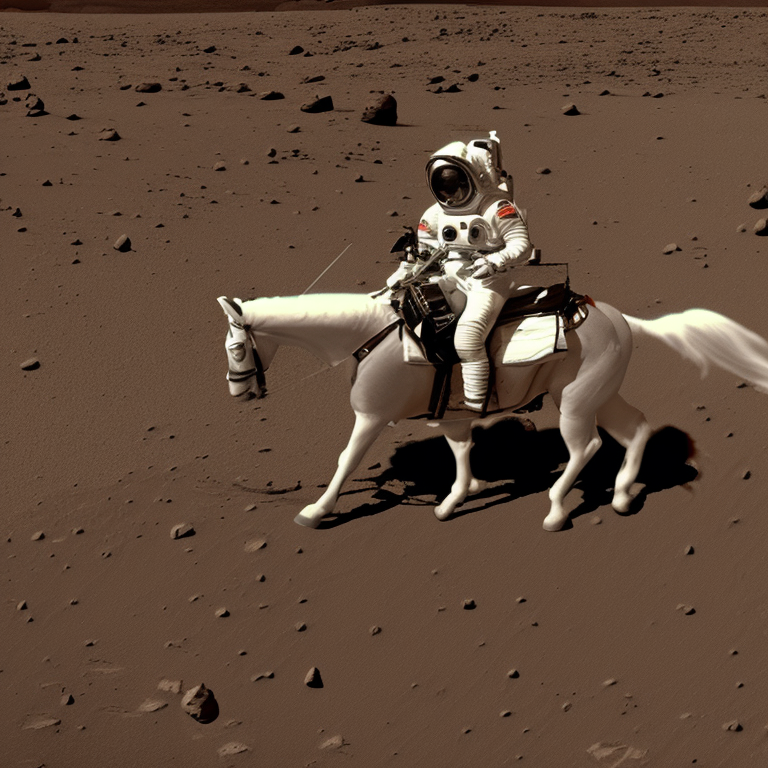

In [6]:
# 推論の実行
prompt = "a photo of an astronaut riding a horse on mars"
image = pipe(prompt, height=768, width=768).images[0]

# 保存と表示
image

In [10]:
import datetime
import subprocess

# 現在の日時を取得
now = datetime.datetime.now()
date_str = now.strftime('%Y%m%d_%H%M%S')

# Pythonバージョンの確認
python_version = subprocess.run(['python', '--version'], stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True).stdout.strip()

# CUDAバージョンの確認
try:
    nvcc_version = subprocess.run(['nvcc', '--version'], stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True).stdout.strip()
    _, cuda_version = nvcc_version.split('\n')[-2].split(',')[1].split()
except:
    cuda_version = 'CPU'

# torchバージョンの確認
import torch
torch_version = torch.__version__

# transformersバージョンの確認
import transformers
transformers_version = transformers.__version__

# 実行時のコマンドと実行結果を保存するファイル名
log_file = f"diffusion_{date_str}.log"


print(f"Python version: {python_version}\n")
print(f"CUDA version: {cuda_version}\n")
print(f"torch version: {torch_version}\n")
print(f"transformers version: {transformers_version}\n\n")

Python version: Python 3.9.15

CUDA version: 11.7

torch version: 2.0.0+cu117

transformers version: 4.28.1


